# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from eda_helpers import *

%matplotlib inline

# Set plot style
sns.set(color_codes=True)
plt.style.use('ggplot')

In [2]:
# Load data
client_df = pd.read_csv('./data/client_data.csv')
price_df = pd.read_csv('./data/price_data.csv')

## Client data

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
client_df['id'].nunique()

14606

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


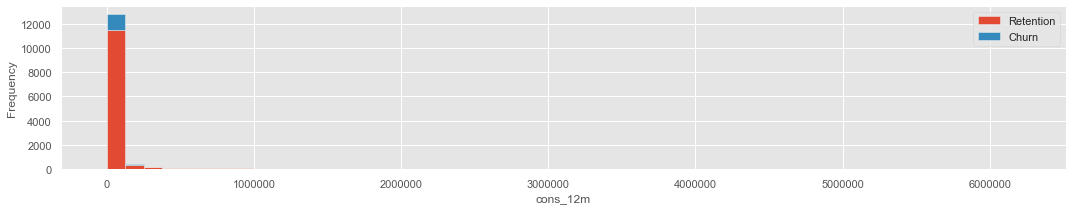

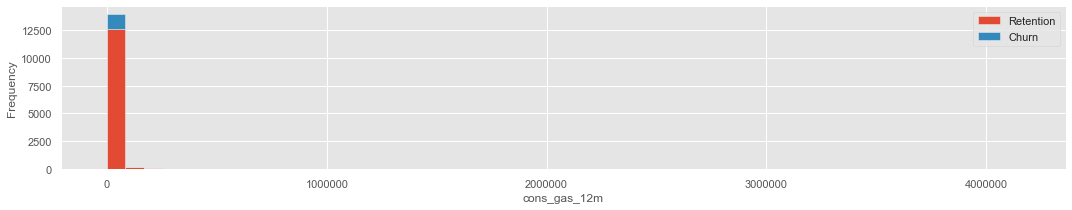

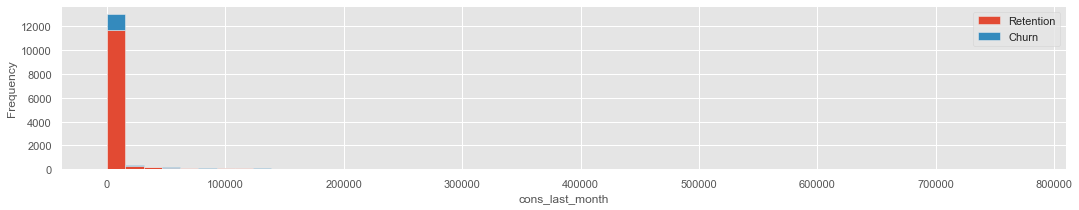

In [7]:
# Consumption
plot_variable_distribution(client_df[['churn', 'cons_12m', 'cons_gas_12m', 'cons_last_month']])

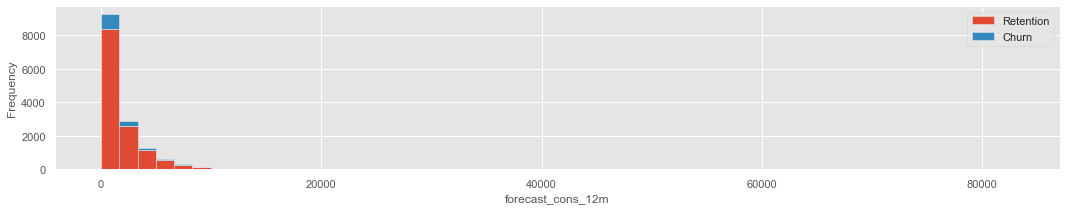

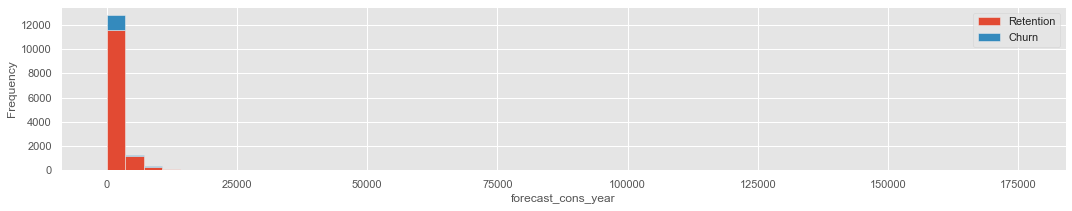

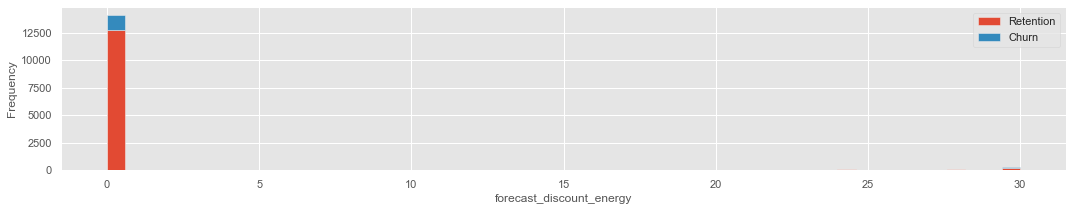

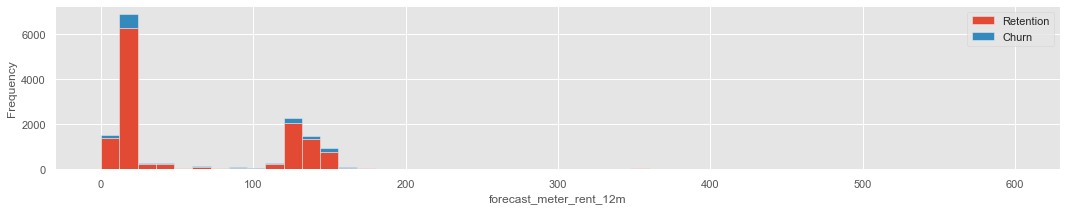

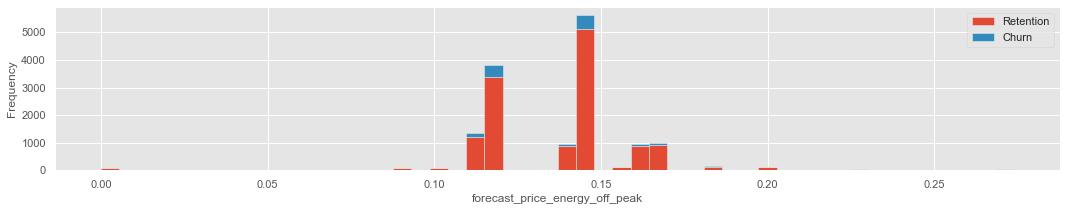

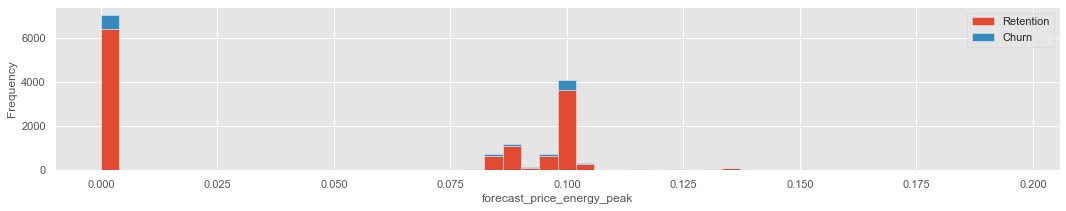

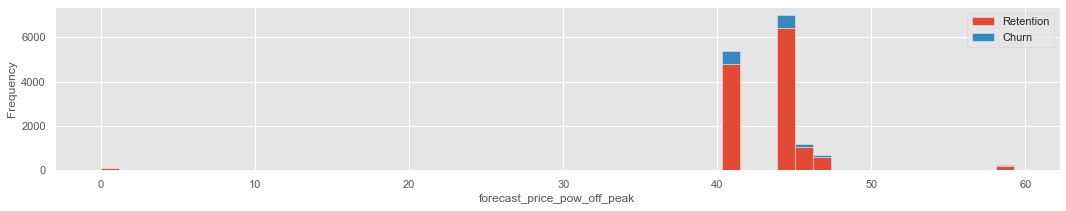

In [8]:
# forecast
plot_variable_distribution(client_df[['churn'] + [col for col in client_df.columns if col.startswith('forecast')]])

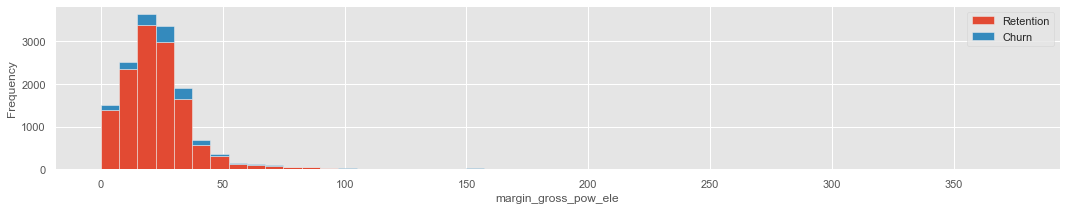

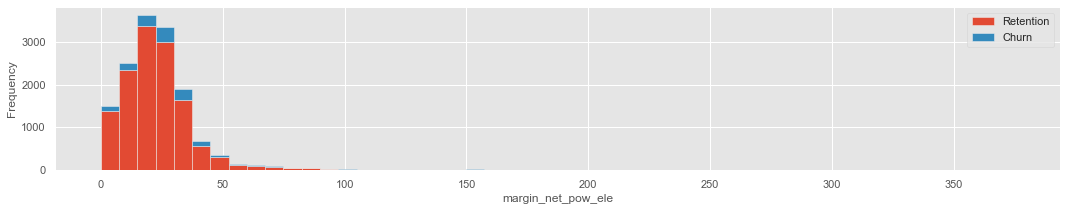

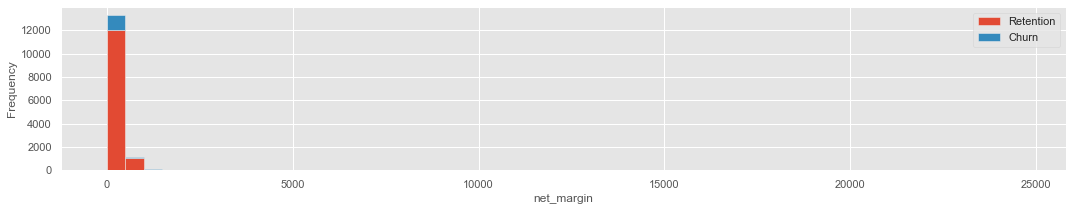

In [9]:
# margin
plot_variable_distribution(client_df[['churn'] + [col for col in client_df.columns if 'margin' in col]])

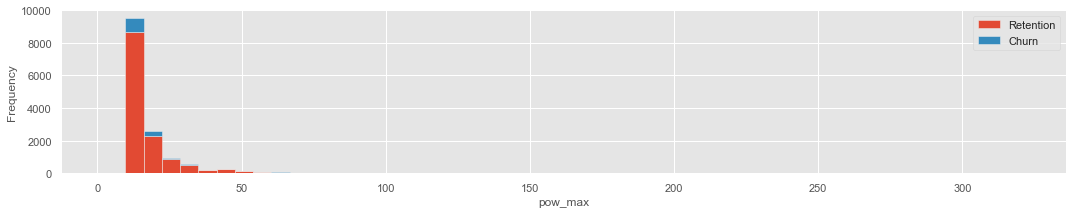

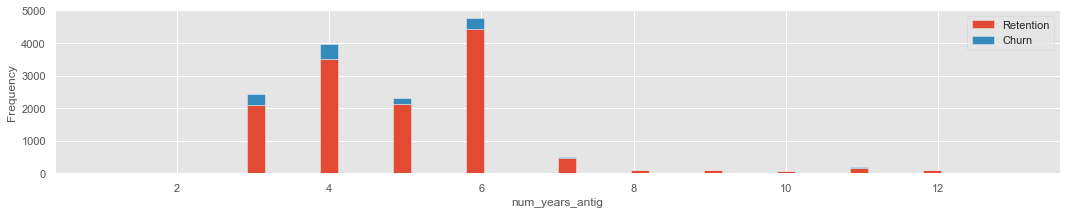

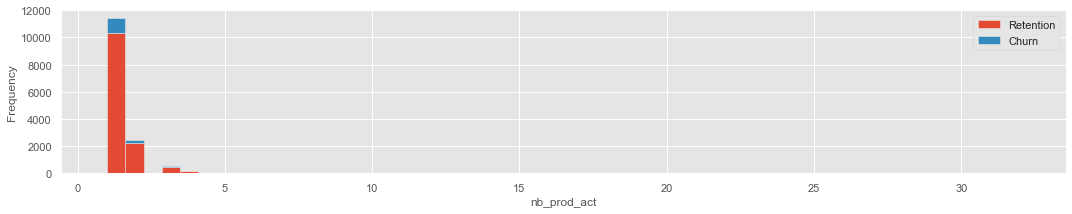

In [10]:
# Other variables
plot_variable_distribution(client_df[['churn', 'pow_max', 'num_years_antig', 'nb_prod_act']])

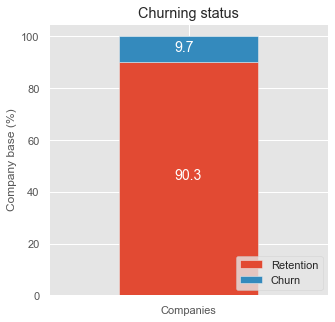

In [11]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

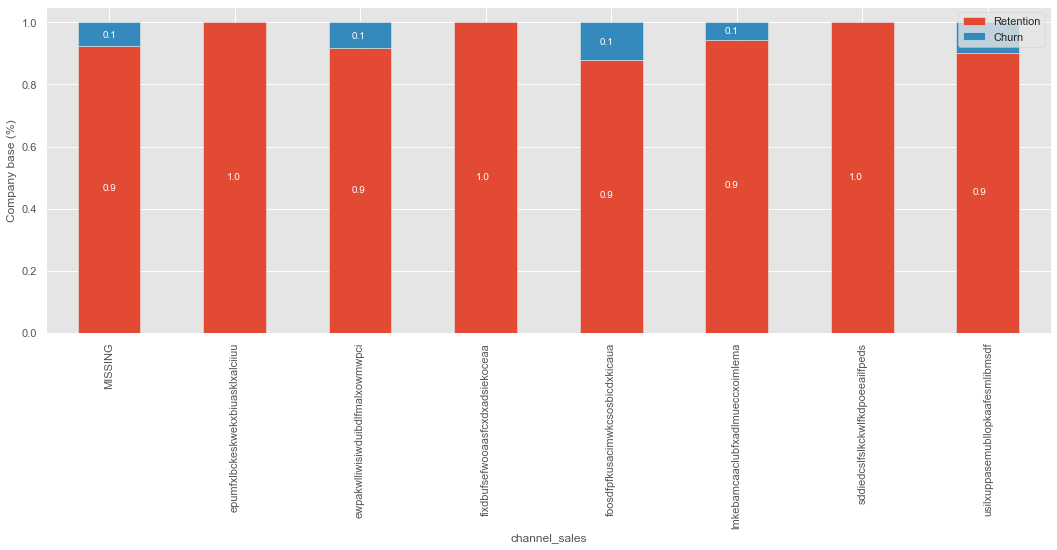

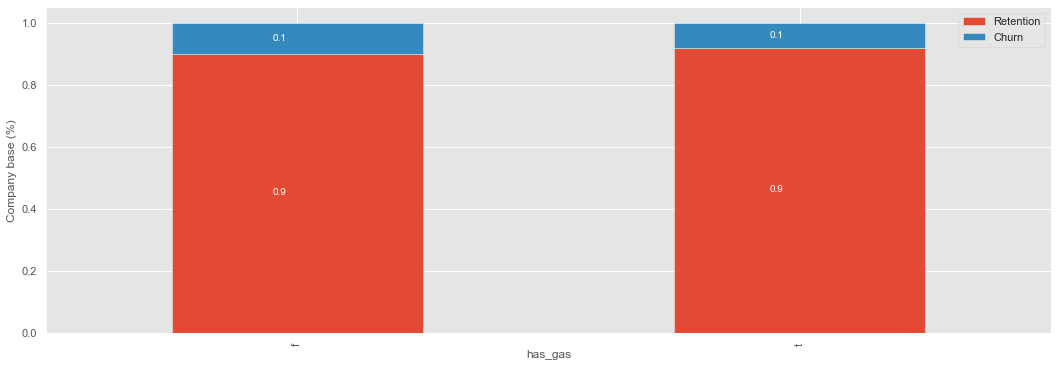

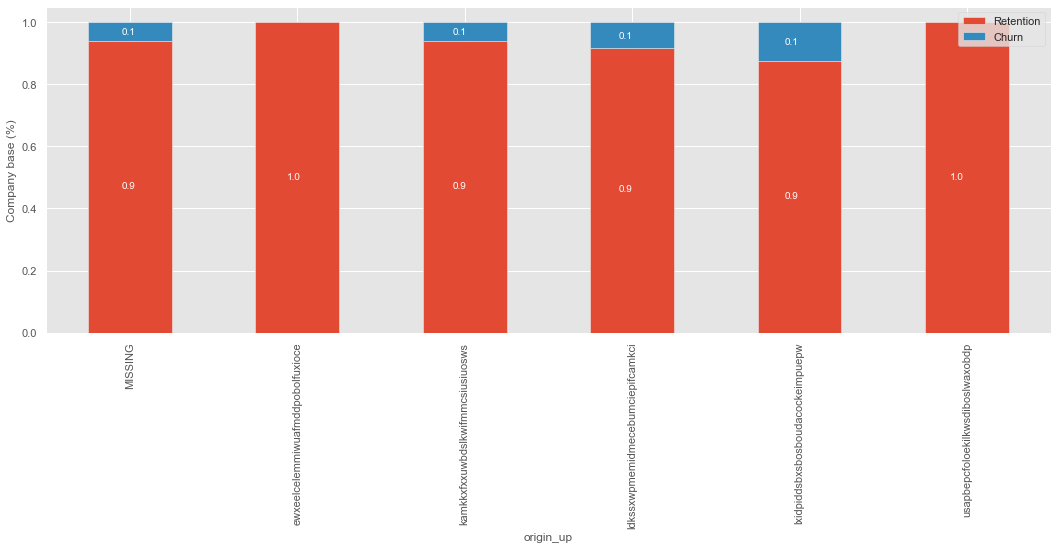

In [12]:
churn_by_category(client_df[['churn', 'channel_sales', 'has_gas', 'origin_up']])

## Price data

In [13]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [14]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [15]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


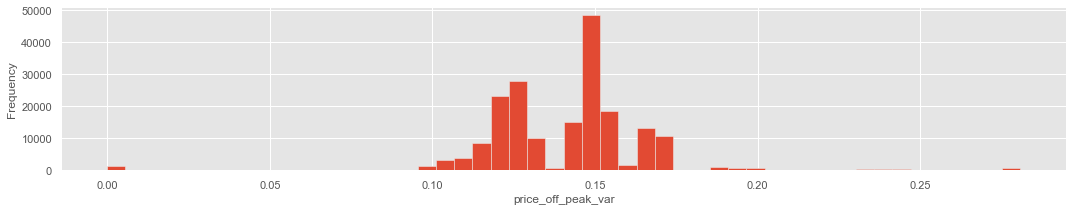

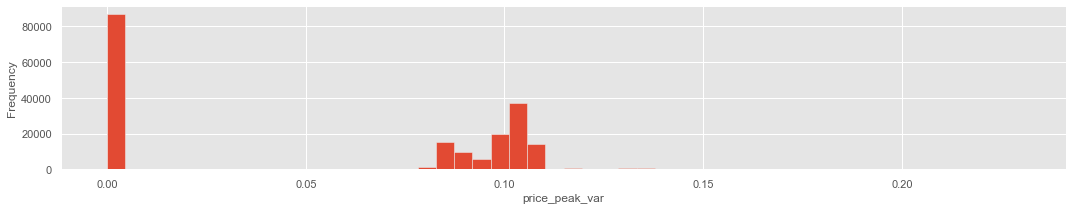

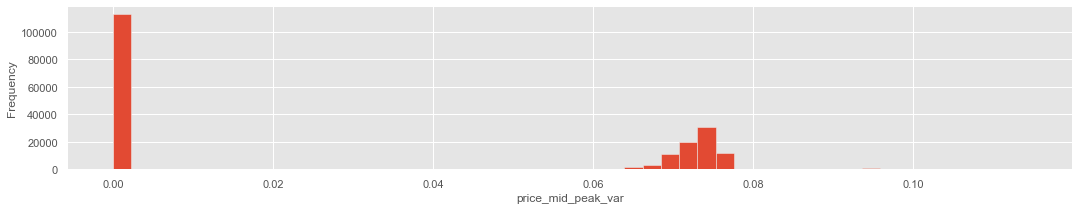

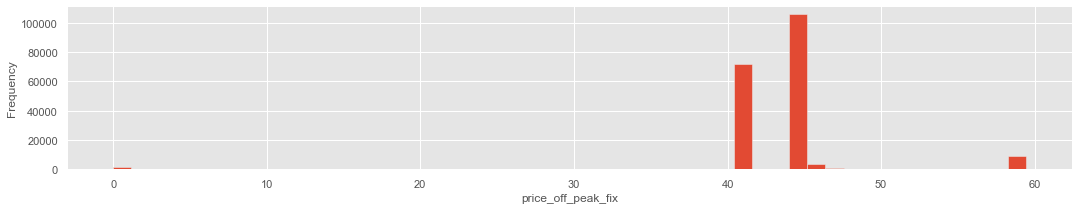

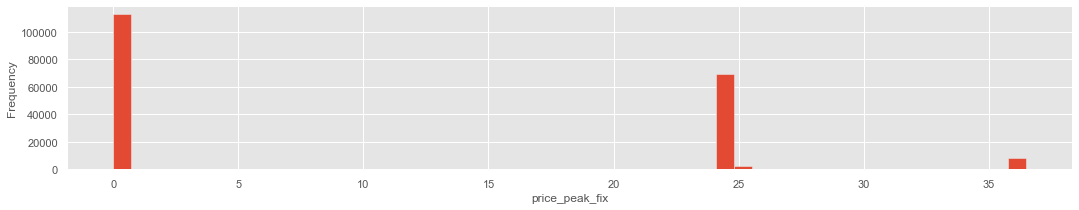

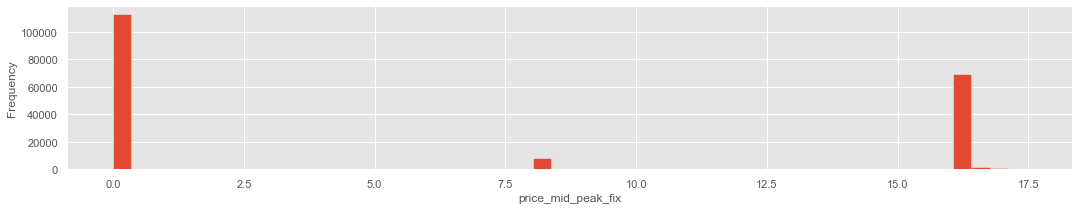

In [16]:
for col in price_df.columns:
    if not pd.api.types.is_numeric_dtype(price_df[col]):
        continue

    fig, axs = plt.subplots(nrows=1, figsize=(18, 3))
    price_df[col].plot(kind='hist', bins=50, ax=axs)
    axs.set_xlabel(col)
    axs.ticklabel_format(style='plain', axis='x')
    plt.show()


## Defining price sensitivity

We can define price sensitivity as the % change in the average price from the 1st to 4th
quarter of the year.

In [17]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'])
price_df['quarter'] = price_df['price_date'].dt.quarter

In [18]:
avg_price_by_quarter = price_df.groupby(['id', 'quarter']).mean().reset_index(level=1)
last_quarter_price = avg_price_by_quarter[avg_price_by_quarter['quarter'] == 4] 
first_quarter_price = avg_price_by_quarter[avg_price_by_quarter['quarter'] == 1]

price_change = ((last_quarter_price - first_quarter_price) / first_quarter_price).drop('quarter', axis=1).dropna()
price_change.head()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,-0.054028,-0.027958,0.032301,0.002674,0.002674,0.002674
0010ee3855fdea87602a5b7aba8e42de,-0.081390,-0.050943,0.011115,0.004016,0.004016,0.004016
00126c87cf78d7604278f0a9adeb689e,-0.102464,-0.077470,-0.029733,0.004016,0.004016,0.004016
0013f326a839a2f6ad87a1859952d227,-0.053193,-0.027799,0.030443,0.000000,0.000000,0.000000
001987ed9dbdab4efa274a9c7233e1f4,-0.061924,-0.028086,0.041657,0.004016,0.004016,0.004016


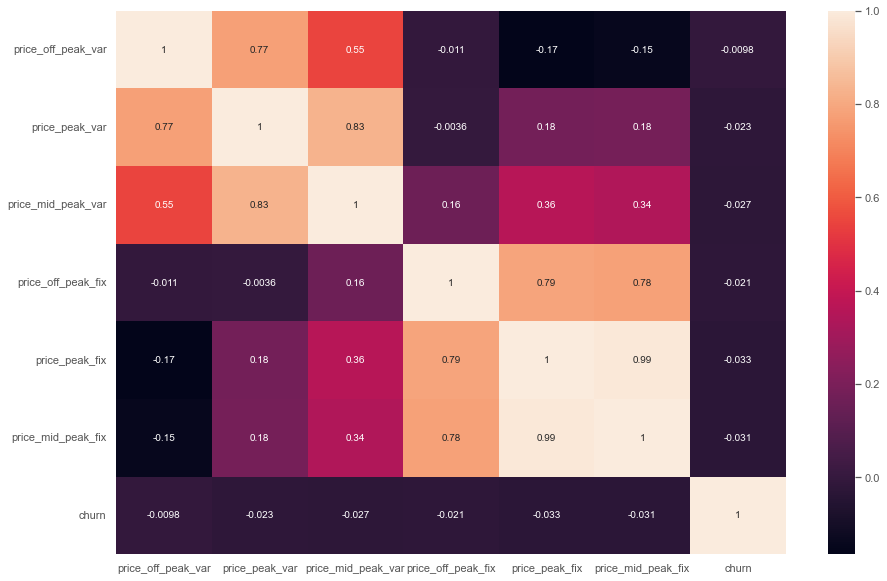

In [19]:
# Check correlation with churn
feature_corr = price_change.reset_index().merge(client_df[['id', 'churn']], on='id', how='inner').corr('spearman')

plt.figure(figsize=(15,10))
sns.heatmap(feature_corr, xticklabels=feature_corr.columns.values, yticklabels=feature_corr.columns.values, annot=True)
# Axis ticks size
plt.xticks()
plt.yticks()
plt.show()

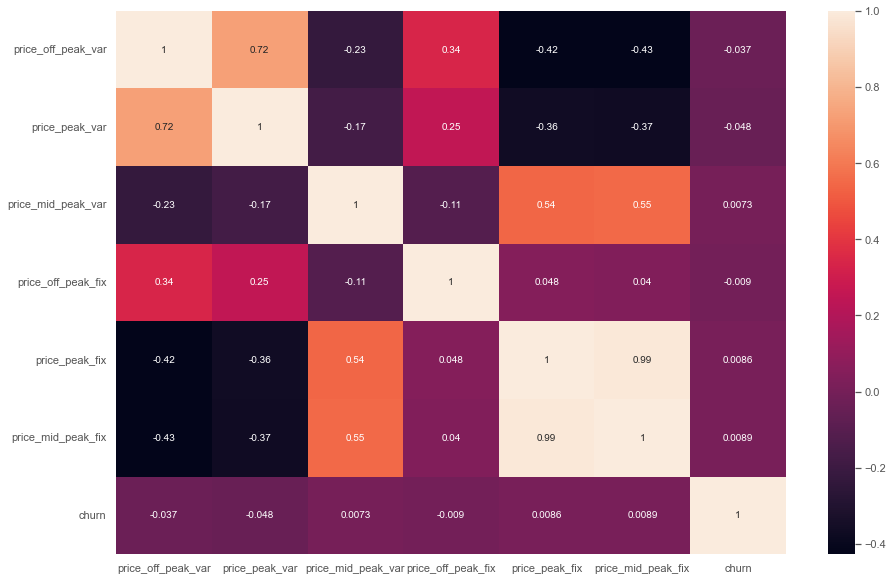

In [20]:
price_change_abs = (last_quarter_price - first_quarter_price).drop('quarter', axis=1).dropna()
feature_corr = price_change_abs.reset_index().merge(client_df[['id', 'churn']], on='id', how='inner').corr('spearman')

plt.figure(figsize=(15,10))
sns.heatmap(feature_corr, xticklabels=feature_corr.columns.values, yticklabels=feature_corr.columns.values, annot=True)
# Axis ticks size
plt.xticks()
plt.yticks()
plt.show()

## Summary

### Key findings

- Approximately 10% of customers have churned
- The distributions of consumption variables are highly skewed
- Significant outliers seem to present in most variables
- Missing data is presented.
- Churn seems to distribute roughly the same across categorical variables
- The defined price sensitivity metric, both relative and absolute, has close to 0
  correlation with customer churn.

### Suggestion for data augmentation
- Competitor price data might help explain customer churn
- Data on demographics (age, location, gender, etc.)
- Engagement history (customer lifetime, past interactions with the company, etc.)
